# 📘 Notebook 02: Exploratory Data Analysis
# Emotional Geography of Books – Shraddha

In [2]:
# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Data shape: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1000 non-null   object 
 1   author          1000 non-null   object 
 2   link            1000 non-null   object 
 3   rating          1000 non-null   float64
 4   ratings_count   1000 non-null   int64  
 5   description     1000 non-null   object 
 6   published_year  1000 non-null   int64  
 7   author_first    1000 non-null   object 
 8   source          1000 non-null   object 
 9   author_country  596 non-null    object 
 10  author_gender   1000 non-null   object 
 11  gender_source   1000 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,1000,998,One by One,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,1000,600,Freida McFadden,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
link,1000,1000,https://www.goodreads.com/book/show/52578297-t...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1000.0,NaN,NaN,NaN,3.98327,0.275731,2.79,3.79,4.0,4.17,4.76
ratings_count,1000.0,NaN,NaN,NaN,201622.796,262069.491392,11200.0,76600.0,116000.0,202250.0,3000000.0
description,1000,1000,Between life and death there is a library.When...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_year,1000.0,NaN,NaN,NaN,2022.0,1.414921,2020.0,2021.0,2022.0,2023.0,2024.0
author_first,1000,429,jennifer,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,1000,1,Goodreads,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author_country,596,208,in The United States,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/0d/_4fqv2g50f36w1vmz28wqkyr0000gn/T/ipykernel_48922/3963813502.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


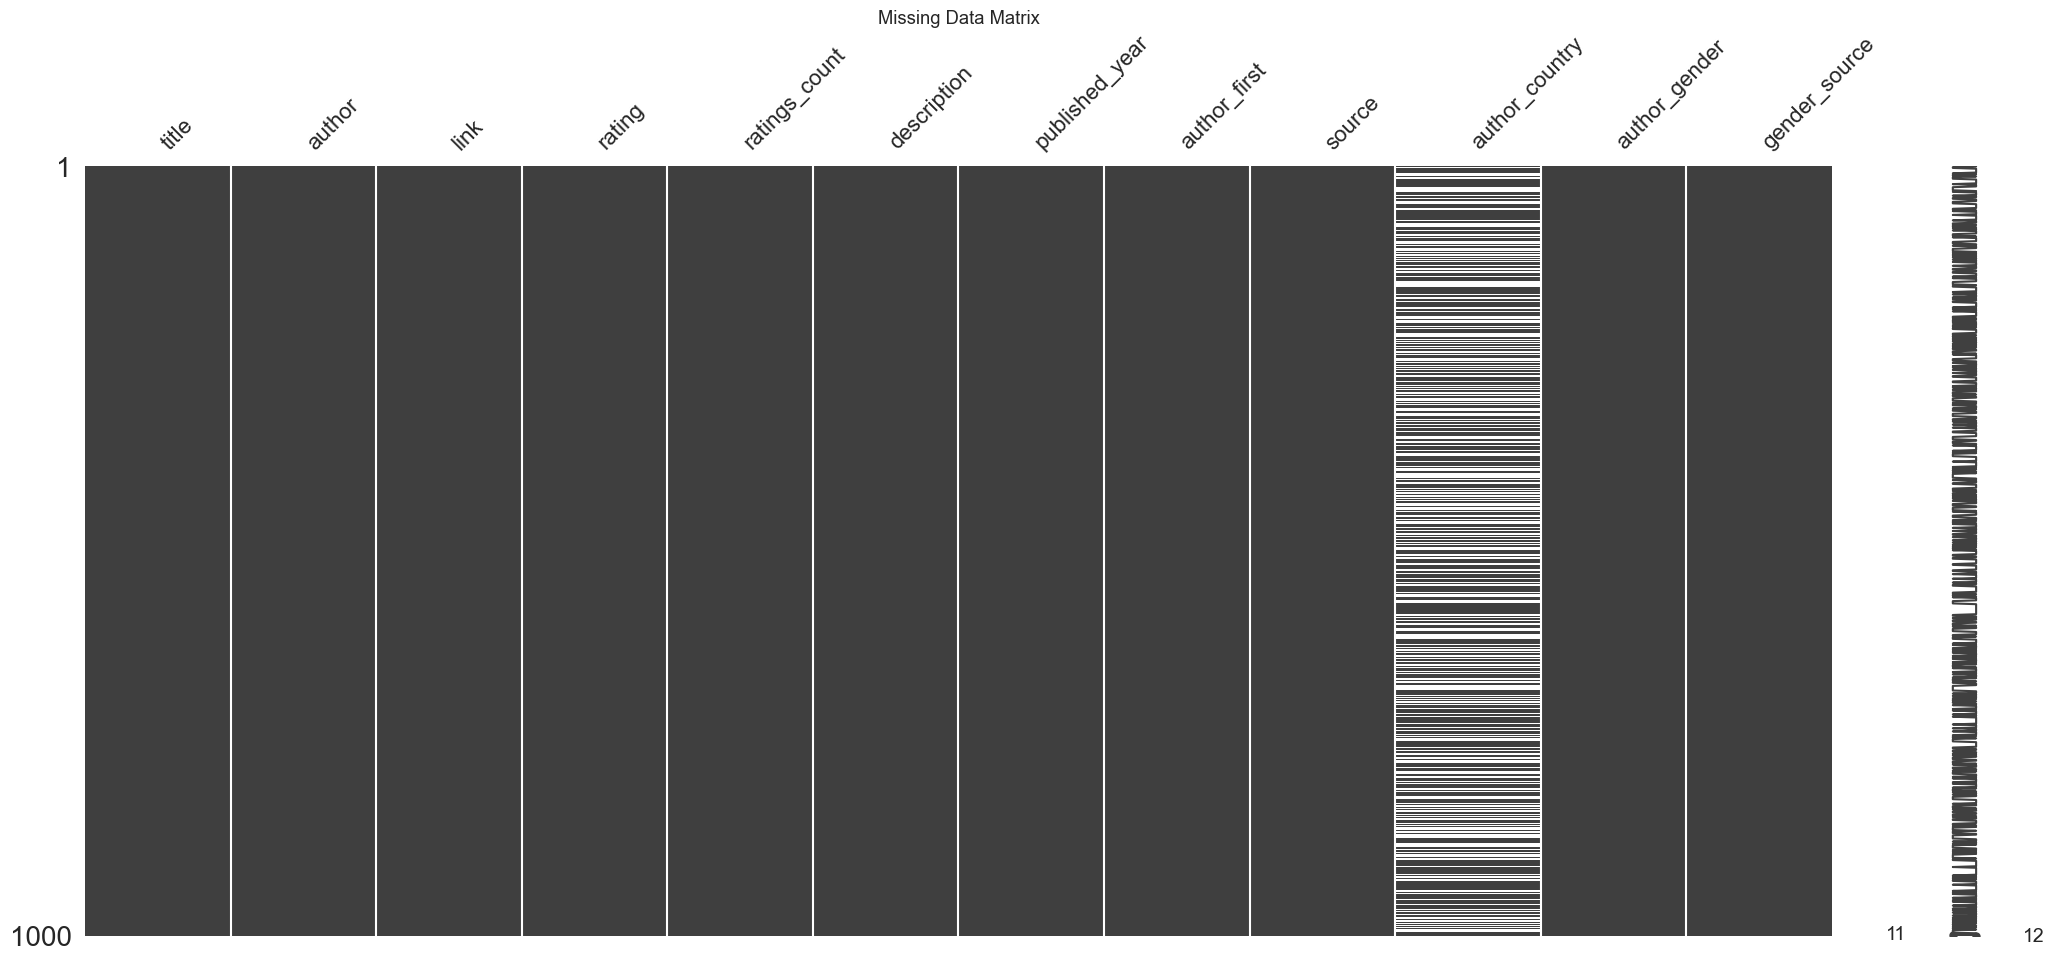

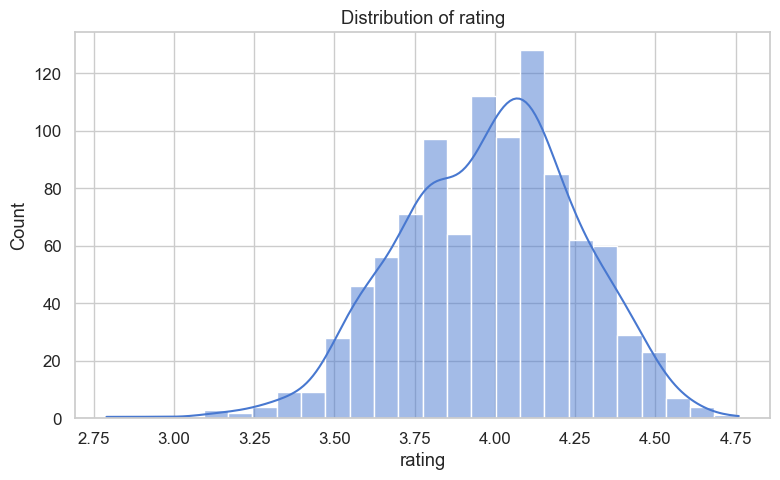

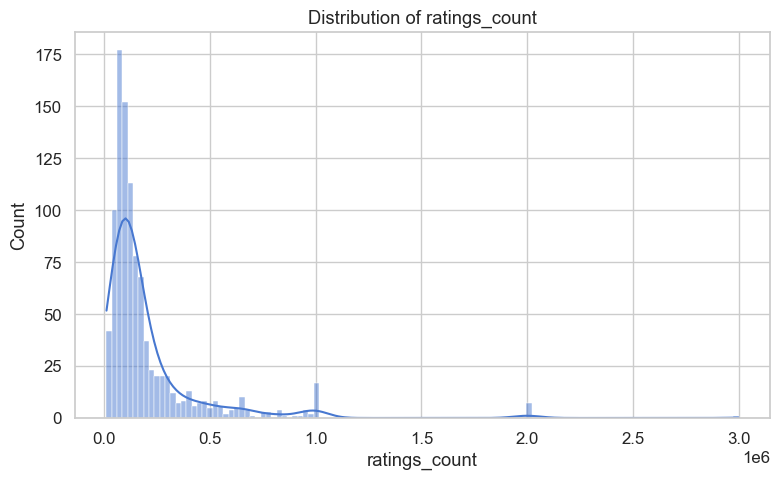

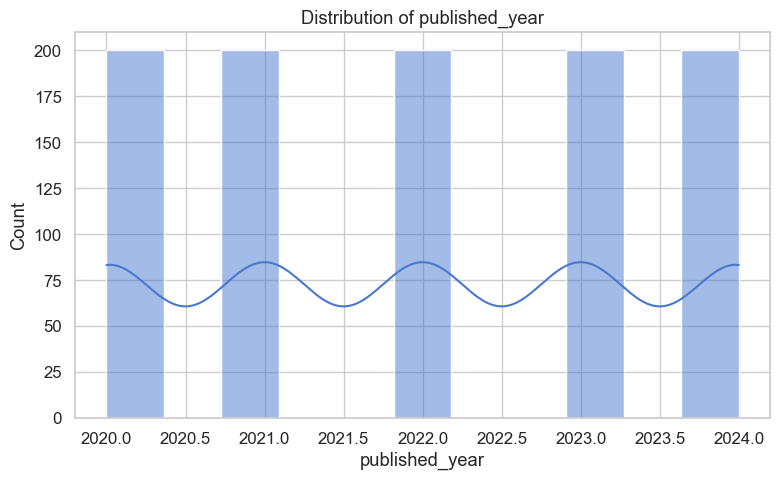

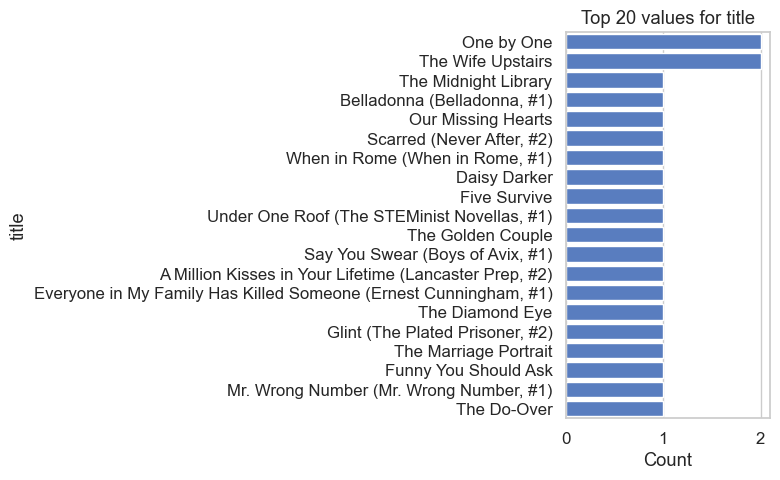

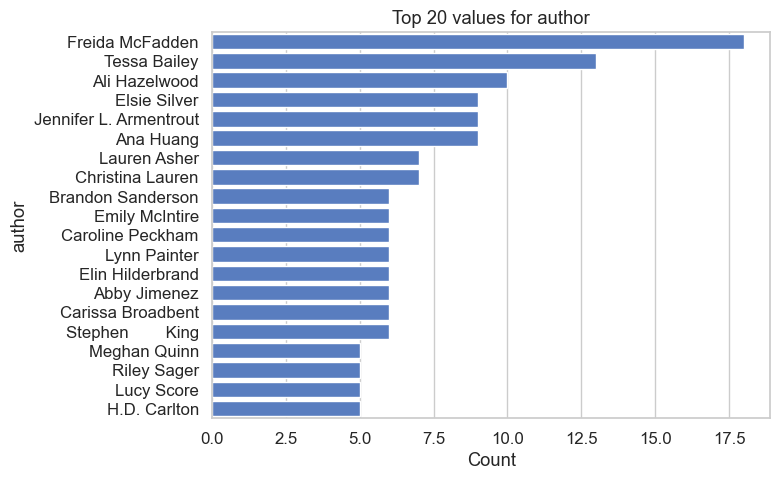

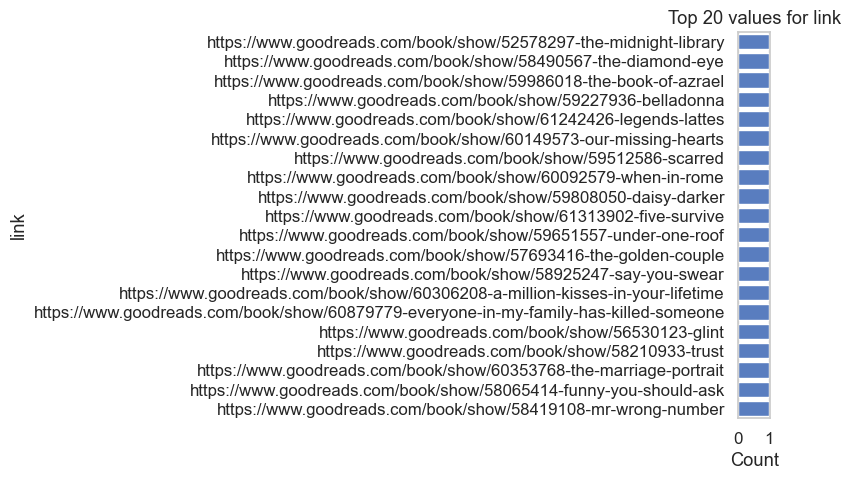

/var/folders/0d/_4fqv2g50f36w1vmz28wqkyr0000gn/T/ipykernel_48922/3963813502.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


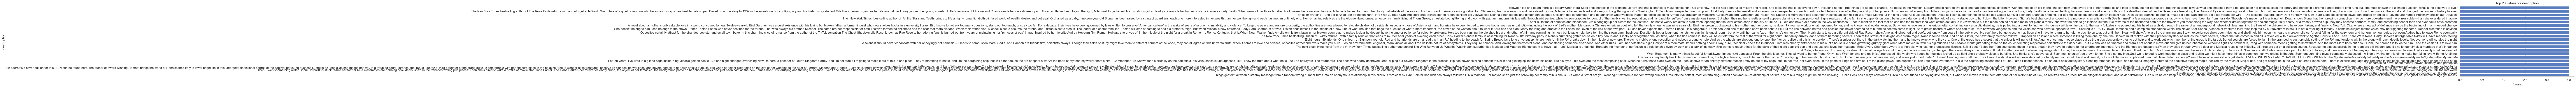

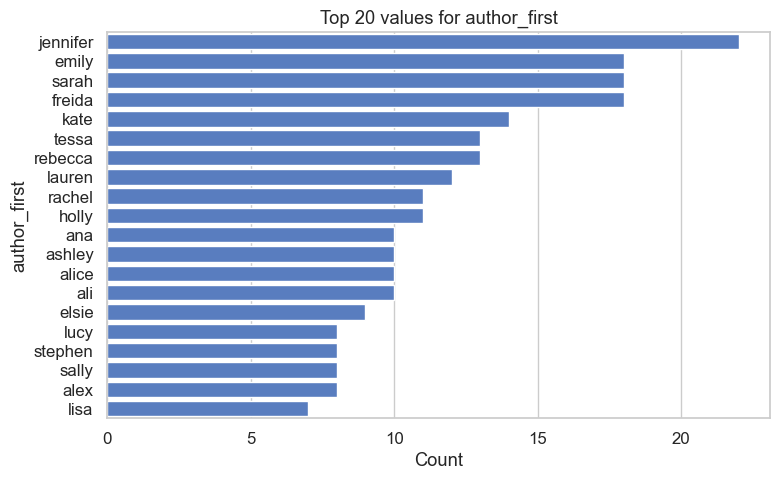

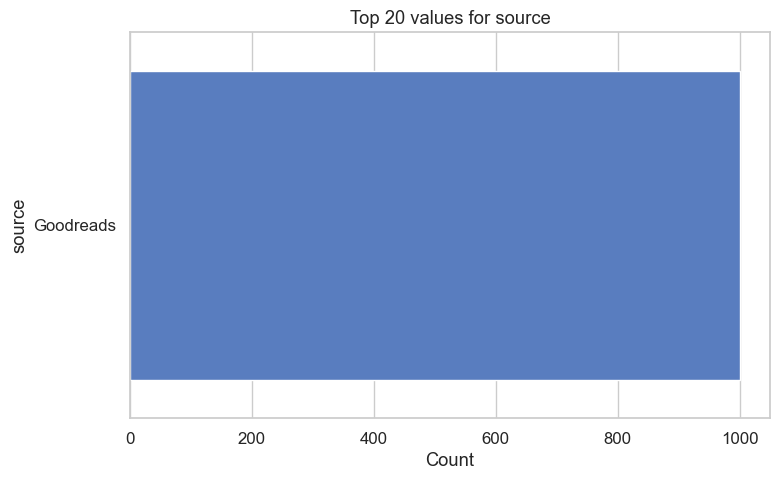

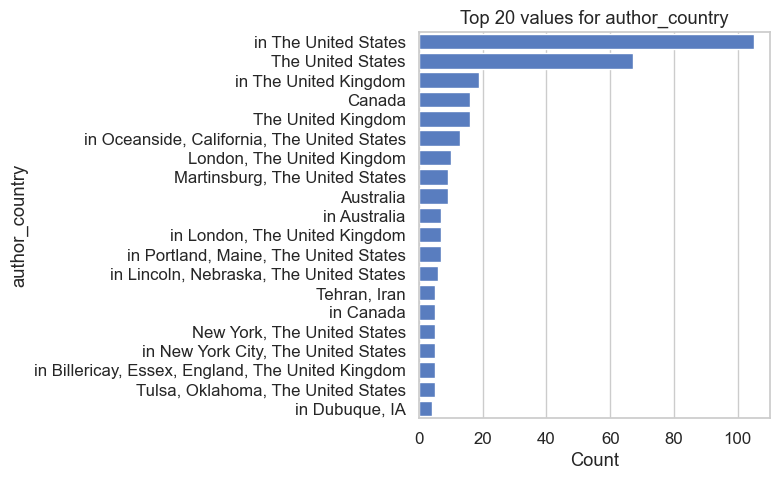

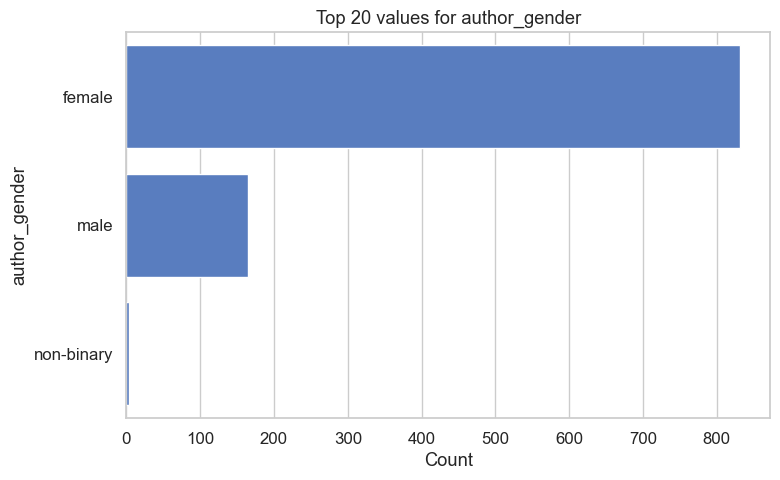

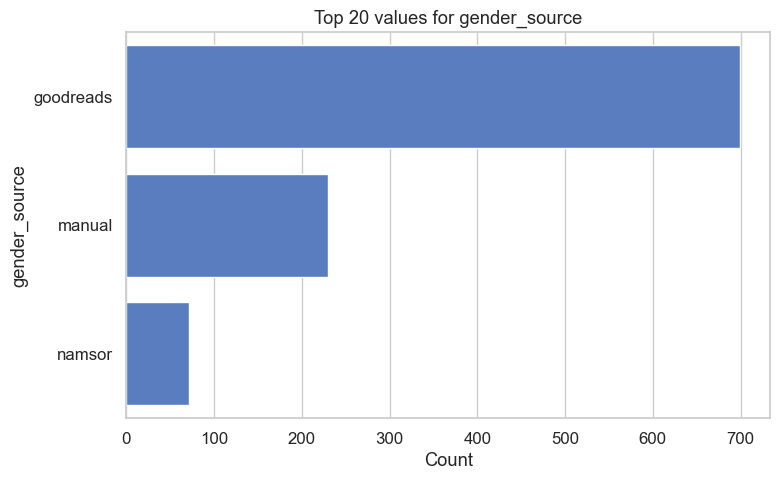

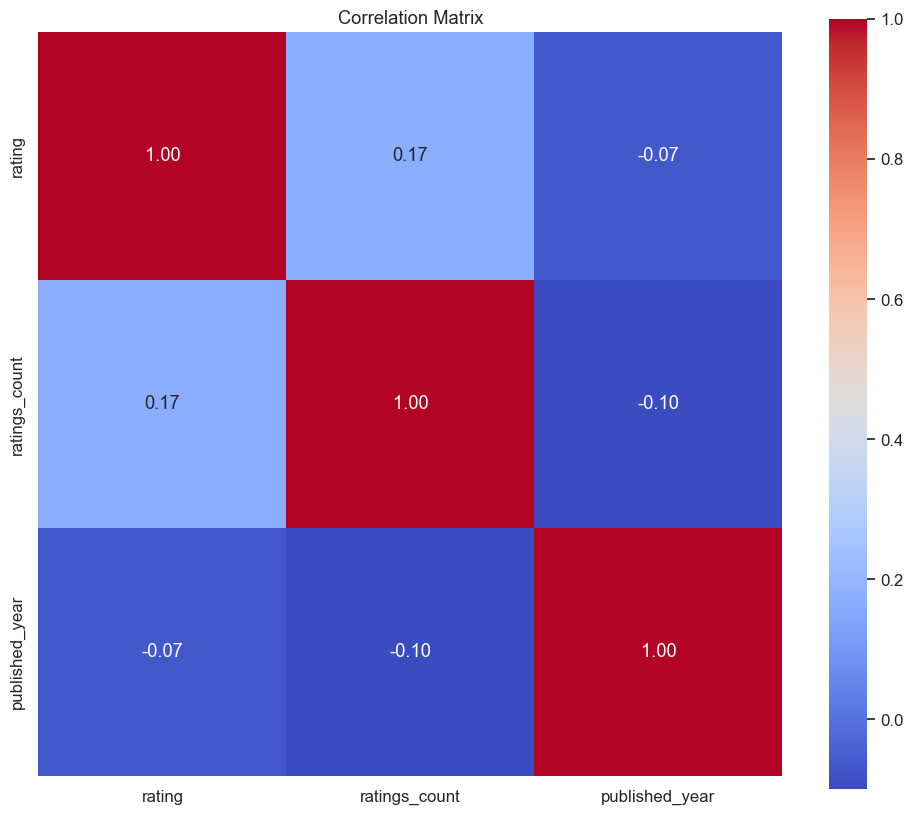

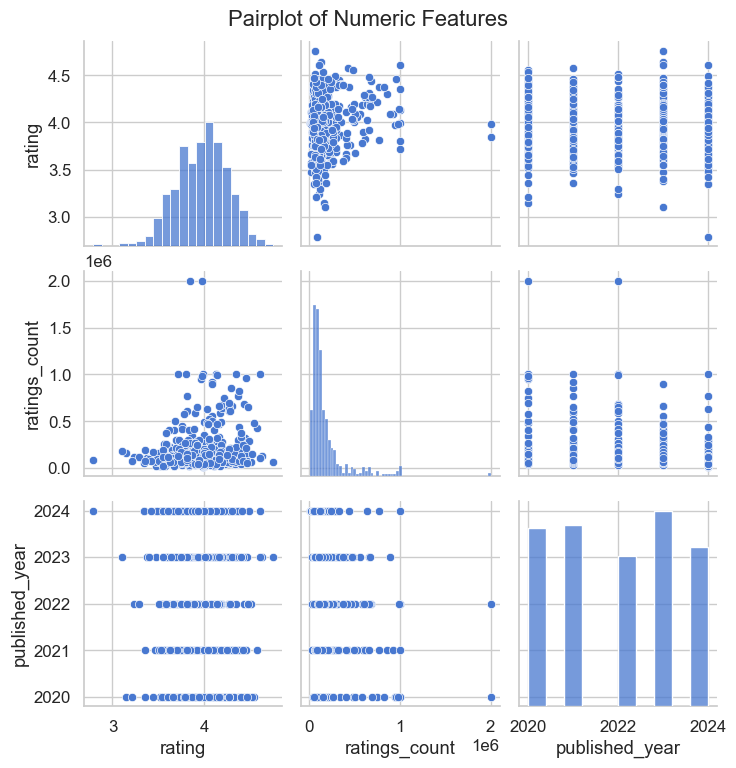

ValueError: Could not interpret value `average_rating` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [3]:
# %% [markdown]
# # Exploratory Data Analysis
#
# Load and explore `clean_books_2020_2024.csv`.

# %% [code]


# Set plotting defaults
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8, 5)

# %% [code]
# 2) Load data
df = pd.read_csv("../data/processed/clean_books_2020_2024.csv")
print(f"Data shape: {df.shape}")
df.head()

# %% [code]
# 3) Schema & basic stats
df.info()
display(df.describe(include="all").T)

# %% [code]
# 4) Missingness visualization
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.tight_layout()
plt.show()

# %% [code]
# 5) Univariate analysis — numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# %% [code]
# 6) Univariate analysis — categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
# exclude any very high-cardinality fields if needed
for col in cat_cols:
    top = df[col].value_counts().nlargest(20)
    plt.figure()
    sns.barplot(x=top.values, y=top.index)
    plt.title(f"Top 20 values for {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# %% [code]
# 7) Bivariate analysis — correlation heatmap of numerics
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

# %% [code]
# 8) Pairwise scatterplots (sampled for performance)
sample = df[num_cols].dropna().sample(min(500, len(df)), random_state=42)
sns.pairplot(sample)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# %% [code]
# 9) Boxplots of numeric vs. key categorical
# e.g. avg_rating by author_gender if present
if "author_gender" in df.columns:
    plt.figure()
    sns.boxplot(x="author_gender", y="average_rating", data=df)
    plt.title("Average Rating by Author Gender")
    plt.show()

# %% [code]
# 10) Trend over time — books published per year
if "year" in df.columns:
    books_per_year = df["year"].value_counts().sort_index()
    plt.figure()
    sns.lineplot(x=books_per_year.index, y=books_per_year.values, marker="o")
    plt.title("Books Published per Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()

# %% [code]
# 11) Save cleaned EDA summary (optional)
df.describe().to_csv("eda_numeric_summary.csv")
df.describe(include=["object"]).to_csv("eda_categorical_summary.csv")

# %% [markdown]
# **Next Steps**  
# - Deeper feature relationships (e.g. text-based features vs. ratings)  
# - Time-series decomposition if you have monthly/weekly data  
# - Topic modeling on titles/descriptions  
# - Clustering authors or books by features  